In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from IMNN import IMNN
from IMNN.ABC import ABC, priors

In [2]:
print("TensorFlow version =", tf.__version__)
print("IMNN version =", IMNN.__version__)

TensorFlow version = 2.1.0
IMNN version = 0.2a4


In [3]:
details = np.load("data/small_details.npz")
input_shape = tuple(details["input_shape"])
n_params = int(details["n_params"])
n_summaries = int(details["n_summaries"])
n_s = int(details["n_s"])
n_d = int(details["n_d"])
fiducial = details["fiducial"]
delta = details["delta"]

fiducial_data = np.load("data/fiducial_data.npy")
derivative_data = np.load("data/small_derivative_data.npy")
validation_fiducial_data = np.load("data/fiducial_validation_data.npy")
validation_derivative_data = np.load("data/small_derivative_validation_data.npy")

In [4]:
print("n_params =", n_params)
print("n_summaries =", n_summaries)
print("n_s =", n_s)
print("n_d =", n_d)
print("input_shape =", input_shape)
print("θ_fid =", fiducial)
print("δθ =", delta)

n_params = 2
n_summaries = 2
n_s = 1000
n_d = 100
input_shape = (10,)
θ_fid = [0. 1.]
δθ = [0.2 0.2]


In [5]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=input_shape),
     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(0.01),
     tf.keras.layers.Dense(128),
     tf.keras.layers.LeakyReLU(0.01),
     tf.keras.layers.Dense(n_summaries),
    ])
opt = tf.keras.optimizers.Adam()

In [6]:
imnn = IMNN.IMNN(n_s=n_s, n_d=n_d, n_params=n_params, n_summaries=n_summaries,
                 model=model, optimiser=opt, θ_fid=fiducial, δθ=delta,
                 fiducial_loader=fiducial_data, derivative_loader=derivative_data,
                 validation_fiducial_loader=validation_fiducial_data,
                 validation_derivative_loader=validation_derivative_data,
                 map_fn=None, check_shape=True,
                 verbose=True, filename="model", save=True)

input_shape = (10,). If this is not what you expected, check your data.
saving model to model


W0212 17:16:48.316718 4441202112 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
imnn.fit(None, λ=10., ϵ=0.01, patience=10, min_iterations=1000)

Using patience length of 10. Maximum number of training iterations is 10000000000.
Saving current model in model


Reached 10 steps without increasing val_det_F. Resetting weights to iteration 5772.


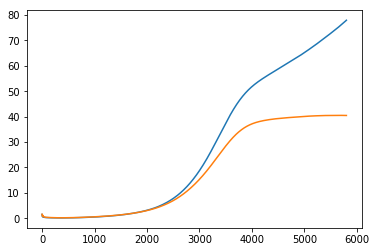

In [10]:
plt.plot(imnn.history["det_F"])
plt.plot(imnn.history["val_det_F"])